## 2. Machine learning for regression

* Based on the previous car price prediction example, we asked how can we help user select the best price to sell their car?
* We will apply regression using ML on the car dataset

In [1]:
import numpy as np
import pandas as pd

## 2.1 Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data 

--2022-09-18 12:37:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: 'data.csv.15'

     0K .......... .......... .......... .......... ..........  3%  865K 2s
    50K .......... .......... .......... .......... ..........  6% 2,81M 1s
   100K .......... .......... .......... .......... .......... 10% 1,49M 1s
   150K .......... .......... .......... .......... .......... 13%  548K 1s
   200K .......... .......... .......... .......... .......... 17%  802K 1s
   250K .......... .......... .......... .......... .......... 20% 7,83M 1s
   300K .......... .......... .......... .......... .......... 24% 

In [4]:
# data into data frame
df = pd.read_csv('data.csv')

# eye balling few rows of the dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# let's make data consistent by making columns names in lower cases and removing spaces
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# we're interested in the object data types 
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
# we want to retrieve all columns that have object data types
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
#let's contain these columns into a list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
# now we should make series of these columns also in lower cases and replace spaces with _

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.2 Exploratory data analysis

In [12]:
# let's explore each columns of the dataset
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # checking all unique values
    print(df[col].nunique()) # checking number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [13]:
# we will now visualise the price column distribution

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

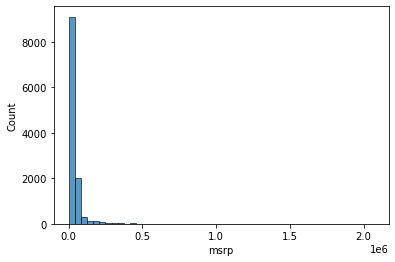

In [14]:
sns.histplot(df.msrp, bins = 50) # bins showing bars
# this tail distributon confuses our ML model

<AxesSubplot:xlabel='msrp', ylabel='Count'>

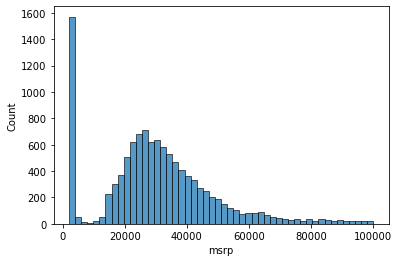

In [15]:
# to see more clear distribution pf prices, let's filter out some price data
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

In [16]:
# however, there are few very large values in this dataset as shows above in the tail distribtuion
# this confuses our ML model. Therefore, we will apply the logarithm to the price column to get more compact values

np.log1p([1,10,1000,100000])

# as we can see that the log of the large values in not very high. Thus, we will use log for high price values

array([ 0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [17]:
# but the problem with log is that of there is a zero value, it will give an error because log of 0 does not exist
np.log([0,1,10,1000,100000])

C:\Users\yadwi\AppData\Local\Temp/ipykernel_7444/561102059.py:2: RuntimeWarning: divide by zero encountered in log
  np.log([0,1,10,1000,100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [18]:
# to avoid this, we will add one to all of the numbers (# this is a common practice)

np.log([0+1, 1+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  6.90875478, 11.51293546])

In [19]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

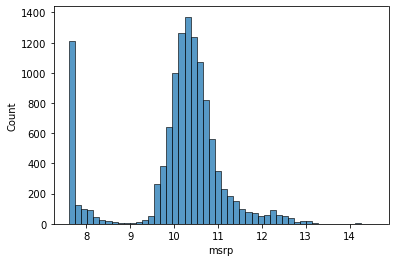

In [20]:
# plot the updated values
sns.histplot(price_logs, bins = 50)


* the tail is gone, all large values are still there in more compact form
* this bell-shaped distribution is called as NORMAL DISTRIBUTION
* long tail distribution usually confuse the ML model. Thus, to remove the effect of long- tail we use logarithm transformation

### checking missing values

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

* missing values are important to deal with before training the model

## 2.3 Setting up the validation framework

+ Before modeling, we need to validate the models
+ For this step, we will take our datasdet and split them into three parts: TRAIN (60%) VALIDATION (20%) TEST (20%)
+ Xt yt for Test; Xv yv for Validation, and Xtest ytest for test dataset 

In [22]:
# We need to check the size of the dataset before splitting it into Train, Validation, and Test parts
len(df)

11914

In [23]:
# 20% of this dataset as integer would be
int(len(df)*0.2)

2382

In [24]:
# let's split the data now

n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n*0.6)

In [25]:
# However due to rounding these splitting dataset would not be equal in size to the main dataset
n, n_val+n_test+n_train

(11914, 11912)

In [26]:
# thus, we will do the follwing:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_val+n_test)

In [27]:
n, n_val+n_test+n_train

(11914, 11914)

In [28]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [29]:
# now we know the size, we will take out this size of data from the dataset using iloc function

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]


However here is a problem. The sequence of data e.g., model of the car is ordered. 
if we look at the df_test, it has all chevrolet data while df_train has none.
To solve this issue, we will reshuffle the sequence of the data

In [30]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [31]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [32]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [33]:
# shuffling data using random.shuffle
idx = np.arange(n)

In [34]:
np.random.shuffle(idx)

In [35]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [36]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3686,mercedes-benz,e-class,2015,diesel,195.0,4.0,automatic,rear_wheel_drive,4.0,"diesel,luxury",midsize,sedan,42,28,617,51800
5733,toyota,highlander,2015,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,24,18,2031,41650
1652,lincoln,aviator,2003,premium_unleaded_(required),302.0,8.0,automatic,rear_wheel_drive,4.0,luxury,midsize,4dr_suv,17,12,61,39485
723,bmw,7_series,2015,premium_unleaded_(required),445.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,24,16,3916,94000
2619,chevrolet,c/k_1500_series,1997,regular_unleaded,230.0,8.0,manual,four_wheel_drive,2.0,NaN,large,extended_cab_pickup,17,11,1385,3046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,volkswagen,jetta,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,873,23650
1669,hyundai,azera,2017,regular_unleaded,293.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,28,19,1439,39300
4971,nissan,frontier,2015,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,21,15,2009,31750
2971,chevrolet,corvette,2015,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,29,17,1385,63160


but here is another problem, we can't replicate and reproducible this data because evertime we shuffle, it will produce new shuffled dataand everyone will have different datasets

The soluion to this porblem is to use random seed generator

In [37]:
np.random.seed(2)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [38]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [39]:
# resetting the index number
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [40]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,40045
1,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
2,subaru,outback,2015,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,33,25,640,27295
3,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,21,586,29450
4,cadillac,escalade,2017,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,4dr_suv,22,15,1624,92195


In [41]:
#checking the length of the datasets
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [42]:
# df_train will be used for our feature matrix but we also need y (target) variable
# let's declare the y variable and apply log transformation for more compact values

y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [43]:
# we now need to delete the target variable from the dataset otherwise when we train the model given the target variable inside,
# it will be a perfect model

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [44]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
1,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916
2,subaru,outback,2015,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,33,25,640
3,mazda,mx-5_miata,2015,premium_unleaded_(recommended),167.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,convertible,28,21,586
4,cadillac,escalade,2017,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,4dr_suv,22,15,1624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,lotus,evora,2013,premium_unleaded_(required),345.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,26,17,613
7146,volkswagen,jetta,2015,premium_unleaded_(recommended),210.0,4.0,automatic,front_wheel_drive,4.0,"factory_tuner,performance",midsize,sedan,32,24,873
7147,pontiac,montana_sv6,2006,regular_unleaded,201.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,23,16,210
7148,bmw,4_series,2016,premium_unleaded_(required),240.0,4.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,35,23,3916


In [45]:
len(y_train)

7150

## 2.5 Linear regression

The output of linear regression model is a number

g(X) ~~ y

g is the ml model which will be linear regression in this case
X is the feature matrix (here the train set df_train) and y is the target variable

In [46]:
# let's look at any row of training set
df_train.iloc[10]

make                             ford
model                      expedition
year                             2016
engine_fuel_type     regular_unleaded
engine_hp                       365.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        21
city_mpg                           15
popularity                       5657
Name: 10, dtype: object

### 2.6 Simplified linear regression model for single observation

Simplified linear regression formula

$g(X_{i})$  ~~  $y_{i}$

where $X_{i}$ is one of the car from the dataset
$y_{i}$ is the price of the car, and

Thus,

 + $g(X_{i1},X_{i2},......,X_{in})$ ~~ $y_{i}$
 
 
 
 ####### continue here ###########
 
 

g(xi) = w0 + w1 xi1 + w2 xi2 + w3 xi3

w0 is the biased term; a prediction that we will make without knowing anything about the car
but we actually know something about the car, we have many features in the dataset

xi1 will be then for example, one of the features e.g., engine_hp and w1 is the weight of this feature

xi2 will be another feature e.g., city_mpg

xi3 will be the popularity

![linear%20regression.png](attachment:linear%20regression.png)

In [47]:
#using few features from the set for prediction
#engine_hp, city_mpg, popularity

xi =[275,14,14]

In [48]:
#to code the formula for three selected features:
def g(xi):
    # do something 
    return 10000

In [49]:
g(xi)

10000

In [50]:
# implementing the formula into coding
# biased term
w0 = 0
w= [1,1,1]

In [51]:
def linear_regression(xi):
    n = len(xi) # length of features and weights
    
    pred = w0
    
    # for all elements
    
    for j in range(n):
        pred = pred +  w[j] * xi[j]
    return pred    
    

In [52]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

We learnt how to apply linear regression in machine learning. The general formula for machine learning for linear regression is as follows:

g(X) ~~ y,

In case of the car price prediction project example,
 g is the linear regression model
 X is the feature matrix and y is the target (here price of the car)
 
 We further applied normal equation into python code:
 
 g(X) = X.W ~~ y
 
 where W is the weights for the features.
 
 
 
 For one single obeservation, this model can be simplified:
  + $g(X_{i})$ ~~ $y_{i}$
  + 


$this_{is}^{inline}$ $

In [53]:
#train_linear_regression(X,y)

### 2.7 Car price baseline model

In [54]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [55]:
# to build baseline, we need to extract all numerical columns
# let's build the model using five numercial columns

df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [56]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

# taking the subset
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,285.0,6.0,22,17,549
1,230.0,6.0,28,18,3916
2,175.0,4.0,33,25,640
3,167.0,4.0,28,21,586
4,420.0,8.0,22,15,1624
...,...,...,...,...,...
7145,345.0,6.0,26,17,613
7146,210.0,4.0,32,24,873
7147,201.0,6.0,23,16,210
7148,240.0,4.0,35,23,3916


In [57]:
# extracting the values as numpy array

X_train = df_train[base].values
X_train

array([[ 285.,    6.,   22.,   17.,  549.],
       [ 230.,    6.,   28.,   18., 3916.],
       [ 175.,    4.,   33.,   25.,  640.],
       ...,
       [ 201.,    6.,   23.,   16.,  210.],
       [ 240.,    4.,   35.,   23., 3916.],
       [ 180.,    4.,   30.,   22.,  819.]])

In [58]:
train_linear_regression(X_train,y_train)
# there are nan values here beacuse there are missing values in the df_train

(nan, array([nan, nan, nan, nan, nan]))

In [59]:
# checking the missing values
df_train[base].isnull().sum()

engine_hp           38
engine_cylinders    19
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [60]:
# by filling missing values with zeros, we make the model ignorant about this feature
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

$g(X_{i})$ = $w_{0}$ +  $X_{i1}$ $w_{1}$ + $X_{i2}$ $w_{2}$

Using our formula, let's say that  $X_{i1}$ value is missing

if we assume this missing value to be zero, this will result in:

$g(X_{i})$ = $w_{0}$ +  0 + $X_{i2}$ $w_{2}$
 
$g(X_{i})$ = $w_{0}$ + $X_{i2}$ $w_{2}$

thus, we will just ignore if this feature existed. However, this is not the best way to deal with missing values.

Imgaine if this missing value was engine_mpg. It is not possible for a car to have zero horse power. So, from commom sense point of view, filling missing values with zeros doesn't make sense but from practical point of view with ML, zero works fine.

In [61]:
# checking x_train with filled zeros instead of missing values

np.isnan(X_train)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [62]:
# including the biased term
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [63]:
w

array([ 9.56355153e-03, -1.49946669e-01,  1.43777630e-02,  1.60037959e-02,
       -8.22371035e-06])

In [64]:
# now we will use these weights to make predictions
y_pred = w0 + X_train.dot(w)

In [65]:
y_train

array([10.59778407, 10.51599393, 10.21449545, ..., 10.09621313,
       10.64187097, 10.05775251])

In [66]:
y_pred

array([10.31373618,  9.86232199,  9.84707626, ...,  9.51155966,
       10.43851416,  9.80227729])

<AxesSubplot:ylabel='Count'>

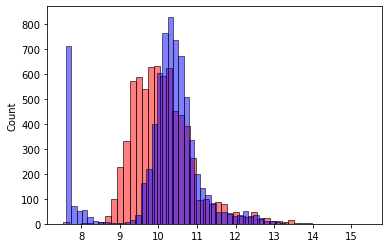

In [67]:
# now let's plot the predicted values and see if they are close to our target variable or not

sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue',alpha = 0.5, bins = 50)

Just by obsvering the distribution of both predicted and target values, we can say that our model might not be idea. But we need a objective way to decide if this model is right or not

### 2.8 Root mean squared error (RMSE)
 + RMSEA is an objective method to evaluate the performance of a regression model
 + Quantifying the performance of the model

RMSEA is the difference between prediction and target values

RMSEA =  (g$(x_{i}$ - $y_{i})$) $^2$

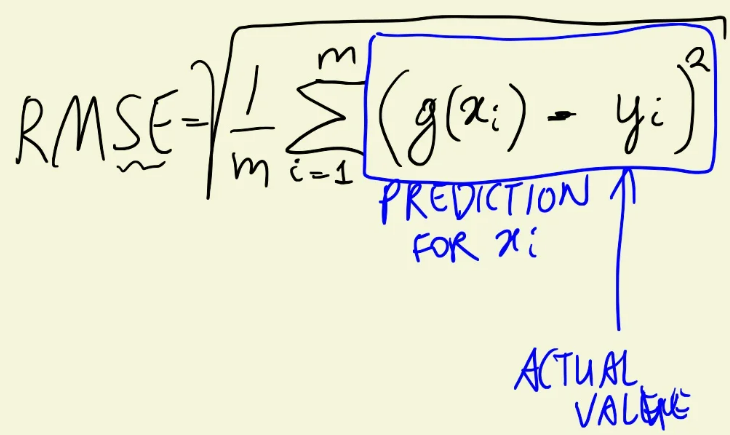

 + the difference between the actual values and predicted values = (g$(x_{i}$ - $y_{i})$)
 + if we take differences between each respective values of y_pred (predicted values) and y_train (actual values) for each array, we get an array:
 
 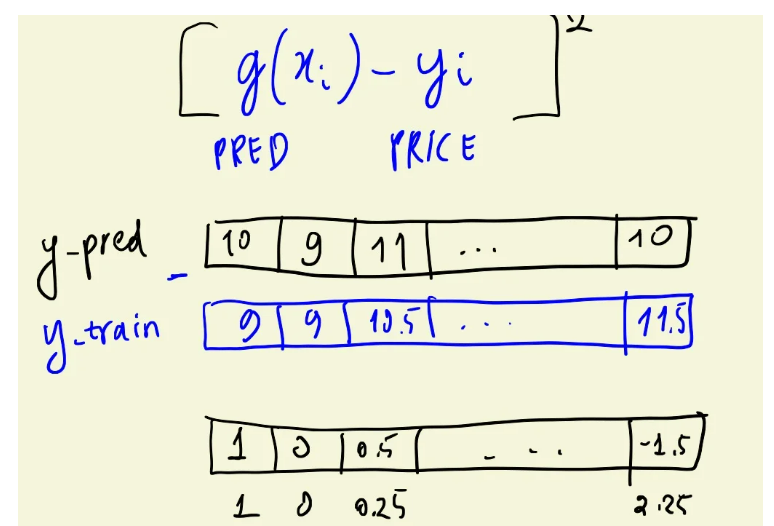
 
 After squarring the errors, we take the average of the sum of the squarred errors
 The result is the mean squared error (MSE)

In [68]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
rmse(y_train, y_pred)

0.7420580465879164

### 2.9 Computing rmse on the validation dataset (validating the model)

+ our data is divided into three parts: Train, validation, and test set
+ what we did previosuly is we trained a linear regression model on the trained set and again applied to the trained datset to calculate RMSE
+ Instead of again applying the model to the trained set, we should apply it to the validation set and then look at the RMSE

In [70]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [71]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # training the model on the train set

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse (y_val, y_pred)

0.7715469334843902

### 2.10 Simple feature engineering

In [72]:
# in our dataset, the most important column is 'year'. 
# The 'year' column decides the price of the car. 

# we can compute the age of the car using the year
# check when this data was collected
df_train.year.max()

2017

In [73]:
# the data was collected in 2017, so we can compute the ages of the car
# we want to use this as one of the features
# let's keep it in the dataset

2017- df_train.year

0        2
1        5
2        2
3        2
4        0
        ..
7145     4
7146     2
7147    11
7148     1
7149     0
Name: year, Length: 7150, dtype: int64

In [74]:
# including the age of car as the feature

def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017-df.year
    features = base+['age']
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [75]:
# check if the model improved

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # training the model on the train set


X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse (y_val, y_pred)

0.7715469334843902

<AxesSubplot:ylabel='Count'>

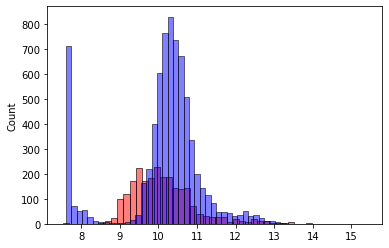

In [76]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue',alpha = 0.5, bins = 50)

+ the model improved by using year feature and we are predicting on the validation dataset not on the trained set

+ looking at the distribution, it'S better than before however, the left side is still not the best.

+ We will use categorical variables for further improvement of the model


### 2.11 Categorical variables

In [77]:
# adding more categorical variables
#using number of doors and make of the car as more features and test if model improved or not
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # training the model on the train set


X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse (y_val, y_pred)

# the model improved !

0.5106627440449168

In [79]:
# more categorical variables...

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
        
    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X
    
    

In [80]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 146.53447009493232
validation: 148.65442787795118


In [81]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 146.53447009493232
validation: 148.65442787795118


In [83]:
# however, this made it worse, The values of rmse are way higher

### 2.12 Regularisation

+ There are sometimes features which are linear combinations of other features for example, sum/product of other columns). 
+ This can lead to columns in the X matrix which are identical. The consequence of this is that the Gram matrix Xᵀ · X becomes a singular matrix and thus cannot be inverted.
+ This problem can be solved with regularization. We can use a regularization parameter that will modify our normal equation in a way that will result in highly reduced weights.
+ In case of linear Regression, we can apply the regularization to the diagonal of the Gram matrix.
+ The regularization parameter which is usually a small decimal value such as 0.00001 or 0.01. This value is simply added to the diagonal 
+ Thus, regularisation is a process of controlling the weights in order to prevent them from having large values.
+ In numpy, regularisation can be applied by creating an identity matrix with np.eye().
+ this matrix is then multiplyied with our regularization parameter and finally adding the resultant matrix to the Gram matrix.

In [84]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

How to find the best regularisation parameter or the best values for the r?

we will try a bunch of different values for r and evaluate the model quality
 
we tried different values of r and checked how it affected the model quality and selected the best regularisation parameter.

### 2.13 Tuning the model

In [85]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1.224069759619668e+16 148.65442787795118
1e-05 10.954498310904144 0.46578659980929654
0.0001 7.483175652486338 0.4657866451025843
0.001 7.469140117689941 0.4657869137284262
0.1 7.220245904547626 0.46586915249904165
1 6.1007400934303755 0.4676426441953875
10 4.316075720823616 0.4819968970264157


In [86]:
# the best values of the biased term and RMSE is given by r = 0.0001,
# thus, we will use the lowest value of regularisaton parameter and train the model on the training set

r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4657869137284262

### 2.14 Using the model

In [87]:
# we will use the train+validation set for training and then use the trained model on the test set

df_full_train = pd.concat([df_train, df_val]) # combine tarin+val
df_full_train = df_full_train.reset_index(drop=True) # index arrange

# have our X and Y parameters
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

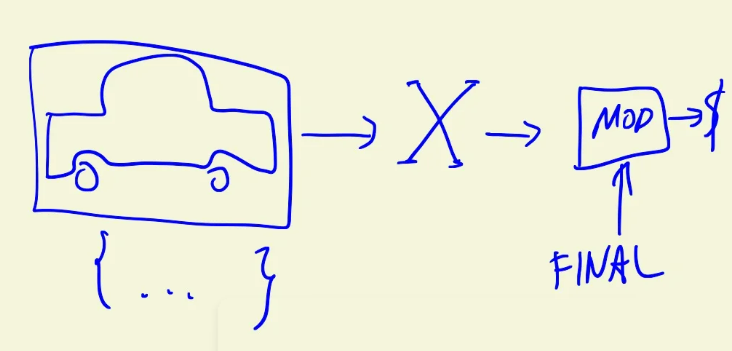

In [88]:
# finally using the model on the test set
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [89]:
# getting the rmse score to see how our model performed
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45897971159377354

+ it's better than before (just using it only on the train set)
+ thus, our model can generalise well.It didn't get this score by chance
+ now, we want to use this model to predict the price of the car
+ we will take out the features of a car and apply to our model and at the end it should predict the price of the car

In [90]:
# take any car from the test dataset and pretend it's a new car dataset (i.e., imagining that we haven't seen this car during training)
df_test.iloc[20]

make                                  land_rover
model                        discovery_series_ii
year                                        2001
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  188.0
engine_cylinders                             8.0
transmission_type                      automatic
driven_wheels                   four_wheel_drive
number_of_doors                              4.0
market_category                           luxury
vehicle_size                             midsize
vehicle_style                            4dr_suv
highway_mpg                                   16
city_mpg                                      12
popularity                                   258
Name: 20, dtype: object

In [91]:
# we will convert this one car into data because this is how usually the request to find the price of car looks like
car = df_test.iloc[20].to_dict()
car

{'make': 'land_rover',
 'model': 'discovery_series_ii',
 'year': 2001,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 188.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 16,
 'city_mpg': 12,
 'popularity': 258}

In [92]:
# prepare the dictionay into a data frame
# as our function prepare_X expects a data frame
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,land_rover,discovery_series_ii,2001,premium_unleaded_(required),188.0,8.0,automatic,four_wheel_drive,4.0,luxury,midsize,4dr_suv,16,12,258


In [93]:
# put this into our X_prepare function
X_small = prepare_X(df_small)

In [95]:
y_pred = w0+ X_small.dot(w) # using the feature matrix
y_pred = y_pred[0]
y_pred # this is the logarithm of the price

9.975199936996864

In [96]:
# let's take exponent of this value
np.expm1(y_pred) # this is the price of the car

21485.92601864883

In [97]:
# let's check what is the price of this car with such characertistic
np.expm1(y_test[20])
# our prediction was bit off, but we see how we can train a model and apply it to predict the price of a single car

36350.00000000001